# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [110]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [111]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [112]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("../data/auto-mpg.csv")

In [113]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


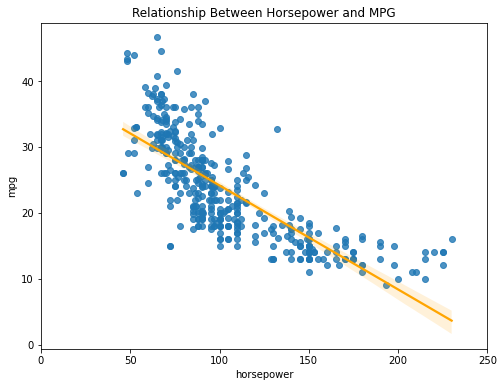

In [114]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [115]:
# call_on_students(1)

#### Answer: 

- Shows the RSS as the slope changes.
- Minimum of the curve is the slope to use.


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [116]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [117]:
# call_on_students(1)

#### Answer: 

- Step size is the partial derivative of the curve
- learning rate is the mount of the step size to actually take.


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [118]:
# call_on_students(1)

#### Answer: 

- classification
- class output 0 or 1 if binary classification
- linear is continuous, logistic uses logit function to derive class probabilities.
- parametric model, it has betas/coefficients

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [119]:
# call_on_students(1)

#### Answer: 

- logreg +: white box, more explainable, less likely to overfit, handles imbalanced data much better
- tree +: lower bias, better with non linear data, easy to explain/chart, no scaling


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [120]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('../data/auto-mpg-classification.csv')

In [121]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


In [122]:
mpg_class.shape

(392, 8)

In [123]:
mpg_class.target.value_counts()

0    293
1     99
Name: target, dtype: int64

In [124]:
mpg_0 = mpg_class[ mpg_class['target'] == 0]

In [125]:
mpg_0.target.value_counts()

0    293
Name: target, dtype: int64

In [126]:
mpg_0 = mpg_0.sample(frac=.5)

In [127]:
mpg_0.shape

(146, 8)

In [128]:
new_df = pd.concat([mpg_0, mpg_class[ mpg_class['target']==1 ]] )

In [129]:
new_df.shape

(245, 8)

In [130]:
new_df.target.value_counts(normalize=True)

0    0.595918
1    0.404082
Name: target, dtype: float64

### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [131]:
# call_on_students(1)

In [132]:
# Train-test split
# Set test_size=0.33 and random_state=42

X=mpg_class.drop('target',axis=1)
y=mpg_class.target


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=42)

In [133]:
# Scale the data
ss = StandardScaler()

In [134]:
X_train_scaled = ss.fit_transform(X_train)

In [135]:
X_test_scaled = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [136]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [137]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

In [138]:
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- class is imbalanced.


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- predict class 0 for observation
- results in a mean accuracy of 74.4%


#### Part 3: How accurate would that baseline be on test data?


In [139]:
# Code to find the answer
# 74.4%

#### Answer:

- 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [140]:
# call_on_students(1)

In [141]:
mpg_class.shape

(392, 8)

#### Answer:

- stratifying the train test split
- SMOTE (synthetic data)
- over or undersampling.


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [142]:
# call_on_students(1)

In [143]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

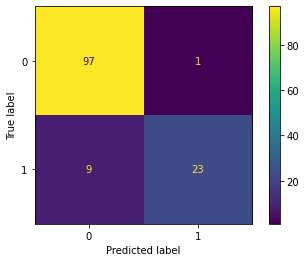

In [144]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [145]:
# call_on_students(1)

In [146]:
y_pred = logreg.predict(X_test_scaled)

In [147]:
# Accuracy
print(accuracy_score(y_test,y_pred))

logreg.score(X_test_scaled,y_test)

0.9230769230769231


0.9230769230769231

In [148]:
# Precision
precision_score(y_test, y_pred)

0.9583333333333334

In [149]:
# Recall
recall_score(y_test, y_pred)

0.71875

In [150]:
# F1-Score
f1_score(y_test, y_pred)

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [151]:
# call_on_students(1)

In [152]:
# Calculate roc-auc

y_probs = logreg.predict_proba(X_test_scaled)

In [153]:
roc_auc_score(y_test, y_probs[:,1])

0.9811862244897959

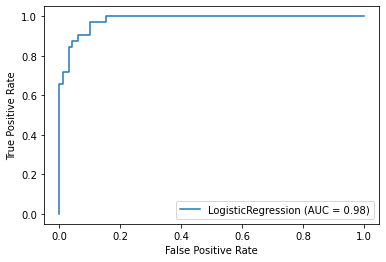

In [154]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [155]:
# call_on_students(1)

#### Answer:

- that looks pretty great, looking good, way to go


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [156]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

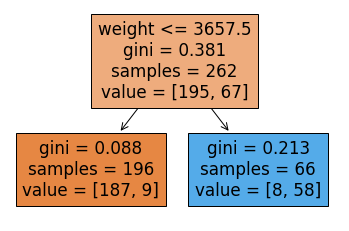

In [157]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

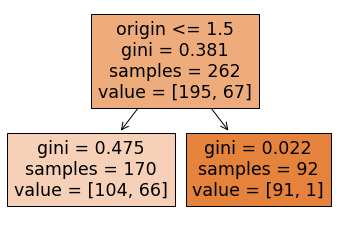

In [158]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [159]:
# call_on_students(1)

#### Answer:

- tree 1, lower gini score.


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [160]:
# call_on_students(1)

In [161]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [162]:
from sklearn.metrics import confusion_matrix

In [163]:
# confusion_matrix()

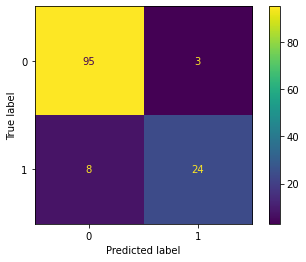

In [164]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_scaled, y_test)
plt.show()

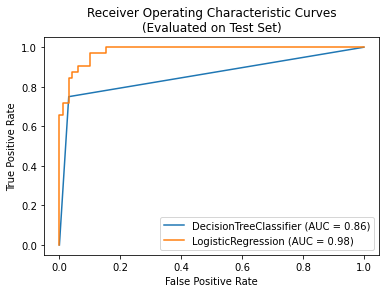

In [165]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

In [166]:
dt_pred = dt.predict(X_test_scaled)

In [167]:
roc_auc_score(y_test,dt_pred)

0.8596938775510203

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [168]:
# call_on_students(1)

#### Answer:

- Logreg is better, more area under the curve.
